In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import pickle

In [52]:
# Load CSV
data = pd.read_csv('data_siswa.csv')
data.head()

,no,nama,nipd,jk,nama_ayah,penghasilan_ayah,nama_ibu,tahun_ibu,pendidikan_ibu,pekerjaan_ibu,penghasilan_ibu,kelas
0,1,Adam Junior Muhlisin,1.23.3153,L,Mumu Muhlisin,"Rp. 2,000,000 - Rp. 4,999,999",Enny Asfiyah,1977.0,D3,PNS/TNI/Polri,"Rp. 2,000,000 - Rp. 4,999,999",11-PSPT
1,2,ADITIA PRASETIO,1.24.3255,L,DENI PASISRANI,"Rp. 1,000,000 - Rp. 1,999,999",SUNENGSIH,0.0,NaN,Tidak bekerja,Tidak Berpenghasilan,10-BCP
2,3,Adly Firlangga Afzaal Putra,1.24.3224,L,NaN,NaN,Nur Aini,0.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,10-TJKT
3,4,ADZRAA AQIILAH,1.22.3063,P,Mulyadi Sanang,"Rp. 2,000,000 - Rp. 4,999,999",Ika sartika,1967.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,12-DKV
4,5,Afifah Nailal Husna,1.22.3087,P,Surur Masrur,"Rp. 5,000,000 - Rp. 20,000,000",Atik Latipah,1982.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,12-PSPT


In [53]:
# Menampilkan informasi dasar tentang data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                283 non-null    int64  
 1   nama              283 non-null    object 
 2   nipd              282 non-null    object 
 3   jk                283 non-null    object 
 4   nama_ayah         273 non-null    object 
 5   penghasilan_ayah  276 non-null    object 
 6   nama_ibu          283 non-null    object 
 7   tahun_ibu         282 non-null    float64
 8   pendidikan_ibu    250 non-null    object 
 9   pekerjaan_ibu     283 non-null    object 
 10  penghasilan_ibu   283 non-null    object 
 11  kelas             283 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.7+ KB
None


In [54]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
print(data.isnull().sum())

no                   0
nama                 0
nipd                 1
jk                   0
nama_ayah           10
penghasilan_ayah     7
nama_ibu             0
tahun_ibu            1
pendidikan_ibu      33
pekerjaan_ibu        0
penghasilan_ibu      0
kelas                0
dtype: int64


In [55]:
# Cek duplikasi
print(data.duplicated().sum())

0


In [56]:
# Mengisi nilai kosong pada nipd dengan nilai yang paling sering muncul (mode)
data['nipd'].fillna(data['nipd'].mode()[0], inplace=True)

# Mengisi nilai kosong pada nama_ayah dengan 'Tidak Diketahui'
data['nama_ayah'].fillna('Tidak Diketahui', inplace=True)

# Mengisi nilai kosong pada penghasilan_ayah dengan nilai yang paling sering muncul (mode)
data['penghasilan_ayah'].fillna(data['penghasilan_ayah'].mode()[0], inplace=True)

# Mengisi nilai kosong pada tahun_ibu dengan median
data['tahun_ibu'].fillna(data['tahun_ibu'].median(), inplace=True)

# Mengisi nilai kosong pada pendidikan_ibu dengan 'Tidak Diketahui'
data['pendidikan_ibu'].fillna('Tidak Diketahui', inplace=True)

In [57]:
# Memastikan tidak ada missing values lagi
print(data.isnull().sum())

no                  0
nama                0
nipd                0
jk                  0
nama_ayah           0
penghasilan_ayah    0
nama_ibu            0
tahun_ibu           0
pendidikan_ibu      0
pekerjaan_ibu       0
penghasilan_ibu     0
kelas               0
dtype: int64


In [58]:
# Mengonversi nipd ke tipe data string
data['nipd'] = data['nipd'].astype(str)

# Mengonversi tahun_ibu ke tipe data integer
data['tahun_ibu'] = data['tahun_ibu'].astype(int)

In [59]:
# Menampilkan kategori yang ada dalam kolom 'penghasilan_ayah'
print(data['penghasilan_ayah'].unique())

# Menampilkan kategori yang ada dalam kolom 'penghasilan_ibu'
print(data['penghasilan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'pendidikan_ibu'
print(data['pendidikan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'kelas'
print(data['pekerjaan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'kelas'
print(data['kelas'].unique())

['Rp. 2,000,000 - Rp. 4,999,999' 'Rp. 1,000,000 - Rp. 1,999,999'
 'Rp. 5,000,000 - Rp. 20,000,000' 'Tidak Berpenghasilan'
 'Rp. 500,000 - Rp. 999,999' 'Kurang dari Rp. 500,000'
 'Lebih dari Rp. 20,000,000']
['Rp. 2,000,000 - Rp. 4,999,999' 'Tidak Berpenghasilan'
 'Rp. 1,000,000 - Rp. 1,999,999' 'Rp. 500,000 - Rp. 999,999'
 'Rp. 5,000,000 - Rp. 20,000,000' 'Kurang dari Rp. 500,000'
 'Lebih dari Rp. 20,000,000']
['D3' 'Tidak Diketahui' 'SMA / sederajat' 'Tidak sekolah' 'SD / sederajat'
 'SMP / sederajat' 'D4' 'S1' 'D1' 'Sp-1' 'D2' 'S2' 'Putus SD']
['PNS/TNI/Polri' 'Tidak bekerja' 'Karyawan Swasta' 'Lainnya' 'Buruh'
 'Wiraswasta' 'Petani' 'Wirausaha' 'Pedagang Kecil'
 'Tidak dapat diterapkan' 'Tenaga Kerja Indonesia']
['11-PSPT' '10-BCP' '10-TJKT' '12-DKV' '12-PSPT' '11-TKJ' '12-TKJ'
 '11-DKV' '10-DKV']


In [60]:
# Mengganti kategori pada kolom 'pendidikan_ibu'
data['pendidikan_ibu'] = data['pendidikan_ibu'].replace({'Sp-1': 'S1', 'Putus SD': 'SD / sederajat', 'Tidak sekolah':'Tidak Diketahui'})

# Menampilkan hasil setelah penggantian
print(data['pendidikan_ibu'].unique())

['D3' 'Tidak Diketahui' 'SMA / sederajat' 'SD / sederajat'
 'SMP / sederajat' 'D4' 'S1' 'D1' 'D2' 'S2']


In [61]:
# Menentukan urutan kategori untuk pendidikan ibu (dari yang paling rendah ke yang tertinggi)
pendidikan_order = [
    'Tidak Diketahui', 'SD / sederajat', 'SMP / sederajat', 'SMA / sederajat', 'D1', 'D2', 'D3', 'D4', 'S1','S2'
]

# Mengonversi kolom 'pendidikan_ibu' menjadi kategori dengan urutan yang sudah ditentukan
data['pendidikan_ibu'] = pd.Categorical(data['pendidikan_ibu'], categories=pendidikan_order, ordered=True)

# Mengambil kode numerik sesuai urutan kategori
data['pendidikan_ibu'] = data['pendidikan_ibu'].cat.codes

# Menampilkan hasil Label Encoding untuk kolom pendidikan_ibu
print(data[['pendidikan_ibu']].head())

   pendidikan_ibu
0               6
1               0
2               3
3               3
4               3


In [62]:
# Melakukan One-Hot Encoding pada kolom 'pekerjaan_ibu', 'penghasilan_ayah', dan 'penghasilan_ibu'
data = pd.get_dummies(data, columns=['penghasilan_ayah', 'penghasilan_ibu'])

In [63]:
# Melakukan One-Hot Encoding pada kolom 'pekerjaan_ibu'
data = pd.get_dummies(data, columns=['pekerjaan_ibu'])

In [64]:
# Mengubah nama kolom yang berhubungan dengan pekerjaan_ibu agar huruf kecil semua dan spasi diganti dengan _
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

# Menampilkan beberapa kolom pertama untuk memeriksa hasilnya
print(data.columns[:30])  # Menampilkan 20 kolom pertama untuk memeriksa

Index(['no', 'nama', 'nipd', 'jk', 'nama_ayah', 'nama_ibu', 'tahun_ibu',
       'pendidikan_ibu', 'kelas', 'penghasilan_ayah_kurang_dari_rp._500,000',
       'penghasilan_ayah_lebih_dari_rp._20,000,000',
       'penghasilan_ayah_rp._1,000,000_-_rp._1,999,999',
       'penghasilan_ayah_rp._2,000,000_-_rp._4,999,999',
       'penghasilan_ayah_rp._5,000,000_-_rp._20,000,000',
       'penghasilan_ayah_rp._500,000_-_rp._999,999',
       'penghasilan_ayah_tidak_berpenghasilan',
       'penghasilan_ibu_kurang_dari_rp._500,000',
       'penghasilan_ibu_lebih_dari_rp._20,000,000',
       'penghasilan_ibu_rp._1,000,000_-_rp._1,999,999',
       'penghasilan_ibu_rp._2,000,000_-_rp._4,999,999',
       'penghasilan_ibu_rp._5,000,000_-_rp._20,000,000',
       'penghasilan_ibu_rp._500,000_-_rp._999,999',
       'penghasilan_ibu_tidak_berpenghasilan', 'pekerjaan_ibu_buruh',
       'pekerjaan_ibu_karyawan_swasta', 'pekerjaan_ibu_lainnya',
       'pekerjaan_ibu_pns/tni/polri', 'pekerjaan_ibu_pedagang_kec

In [65]:
data.head()

,no,nama,nipd,jk,nama_ayah,nama_ibu,tahun_ibu,pendidikan_ibu,kelas,"penghasilan_ayah_kurang_dari_rp._500,000",...,pekerjaan_ibu_karyawan_swasta,pekerjaan_ibu_lainnya,pekerjaan_ibu_pns/tni/polri,pekerjaan_ibu_pedagang_kecil,pekerjaan_ibu_petani,pekerjaan_ibu_tenaga_kerja_indonesia,pekerjaan_ibu_tidak_bekerja,pekerjaan_ibu_tidak_dapat_diterapkan,pekerjaan_ibu_wiraswasta,pekerjaan_ibu_wirausaha
0,1,Adam Junior Muhlisin,1.23.3153,L,Mumu Muhlisin,Enny Asfiyah,1977,6,11-PSPT,False,...,False,False,True,False,False,False,False,False,False,False
1,2,ADITIA PRASETIO,1.24.3255,L,DENI PASISRANI,SUNENGSIH,0,0,10-BCP,False,...,False,False,False,False,False,False,True,False,False,False
2,3,Adly Firlangga Afzaal Putra,1.24.3224,L,Tidak Diketahui,Nur Aini,0,3,10-TJKT,False,...,False,False,False,False,False,False,True,False,False,False
3,4,ADZRAA AQIILAH,1.22.3063,P,Mulyadi Sanang,Ika sartika,1967,3,12-DKV,False,...,False,False,False,False,False,False,True,False,False,False
4,5,Afifah Nailal Husna,1.22.3087,P,Surur Masrur,Atik Latipah,1982,3,12-PSPT,False,...,False,False,False,False,False,False,True,False,False,False


In [67]:
# Menjumlahkan kolom One-Hot Encoding yang terkait dengan penghasilan_ayah dan penghasilan_ibu
data['total_penghasilan'] = (
    data['penghasilan_ayah_rp._500,000_-_rp._999,999'] * 750000 +
    data['penghasilan_ayah_rp._1,000,000_-_rp._1,999,999'] * 1500000 +
    data['penghasilan_ayah_rp._2,000,000_-_rp._4,999,999'] * 3000000 +
    data['penghasilan_ayah_rp._5,000,000_-_rp._20,000,000'] * 12500000 +
    data['penghasilan_ayah_tidak_berpenghasilan'] * 0 +
    data['penghasilan_ayah_kurang_dari_rp._500,000'] * 250000 +
    data['penghasilan_ayah_lebih_dari_rp._20,000,000'] * 25000000 +
    data['penghasilan_ibu_rp._500,000_-_rp._999,999'] * 750000 +
    data['penghasilan_ibu_rp._1,000,000_-_rp._1,999,999'] * 1500000 +
    data['penghasilan_ibu_rp._2,000,000_-_rp._4,999,999'] * 3000000 +
    data['penghasilan_ibu_rp._5,000,000_-_rp._20,000,000'] * 12500000 +
    data['penghasilan_ibu_tidak_berpenghasilan'] * 0 +
    data['penghasilan_ibu_kurang_dari_rp._500,000'] * 250000 +
    data['penghasilan_ibu_lebih_dari_rp._20,000,000'] * 25000000
)

# Menampilkan beberapa baris pertama untuk memeriksa kolom 'total_penghasilan'
print(data[['total_penghasilan']].head())

   total_penghasilan
0            6000000
1            1500000
2            3000000
3            3000000
4           12500000


In [69]:
# Menentukan kategori potongan SPP berdasarkan total penghasilan, pendidikan ibu, dan pekerjaan ibu
def get_spp_discount(total_penghasilan, pendidikan_ibu, pekerjaan_ibu_petani, pekerjaan_ibu_pedagang_kecil, penghasilan_ibu_tidak_berpenghasilan):
    # Potongan berdasarkan total penghasilan
    if 0 <= total_penghasilan <= 999999:
        spp = 'Potongan 70%'
    elif 1000000 <= total_penghasilan <= 1999999:
        spp = 'Potongan 50%'
    elif 2000000 <= total_penghasilan <= 4999999:
        spp = 'Potongan 30%'
    else:
        spp = 'Tidak Layak'

    # Menambahkan aturan berdasarkan pendidikan ibu
    if pendidikan_ibu >= 8:  # Misalnya, jika ibu S1 ke atas, beri potongan tambahan
        if spp == 'Potongan 70%':
            spp = 'Potongan 50%'  # Mengurangi potongan menjadi 50%
        elif spp == 'Potongan 50%':
            spp = 'Potongan 30%'  # Mengurangi potongan menjadi 30%
        elif spp == 'Potongan 30%':
            spp = 'Tidak Layak'   # Menghapus potongan
    elif pendidikan_ibu <= 3:  # Jika pendidikan ibu rendah, beri potongan lebih tinggi
        if spp == 'Potongan 50%':
            spp = 'Potongan 70%'  # Mengembalikan potongan menjadi 70%

    # Menambahkan aturan berdasarkan pekerjaan ibu (menggunakan One-Hot Encoding kolom)
    if pekerjaan_ibu_petani == 1 or pekerjaan_ibu_pedagang_kecil == 1 or penghasilan_ibu_tidak_berpenghasilan == 1:
        if spp == 'Potongan 50%':
            spp = 'Potongan 70%'  # Memberikan potongan lebih tinggi
        elif spp == 'Potongan 30%':
            spp = 'Potongan 50%'  # Menambah potongan

    return spp

# Mengaplikasikan fungsi ke kolom 'total_penghasilan', 'pendidikan_ibu', dan kolom One-Hot Encoding untuk pekerjaan ibu dan penghasilan ibu
data['potongan_spp'] = data.apply(lambda row: get_spp_discount(
    row['total_penghasilan'], 
    row['pendidikan_ibu'], 
    row['pekerjaan_ibu_petani'], 
    row['pekerjaan_ibu_pedagang_kecil'], 
    row['penghasilan_ibu_tidak_berpenghasilan']
), axis=1)

# Menampilkan hasil target potongan SPP
data[['total_penghasilan', 'pendidikan_ibu', 'pekerjaan_ibu_petani', 'pekerjaan_ibu_pedagang_kecil', 'penghasilan_ibu_tidak_berpenghasilan', 'potongan_spp']].head()

,total_penghasilan,pendidikan_ibu,pekerjaan_ibu_petani,pekerjaan_ibu_pedagang_kecil,penghasilan_ibu_tidak_berpenghasilan,potongan_spp
0,6000000,6,False,False,False,Tidak Layak
1,1500000,0,False,False,True,Potongan 70%
2,3000000,3,False,False,True,Potongan 50%
3,3000000,3,False,False,True,Potongan 50%
4,12500000,3,False,False,True,Tidak Layak


In [73]:
# Memisahkan fitur dan target
X = data.drop(columns=['potongan_spp', 'no', 'nama', 'nama_ayah', 'nama_ibu', 'tahun_ibu', 'nipd', 'jk', 'kelas'])  # Drop kolom yang tidak digunakan
y = data['potongan_spp']  # Target adalah kolom 'potongan_spp'

In [74]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data latih dan data uji
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(226, 27) (57, 27) (226,) (57,)


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Menyusun grid parameter yang akan dicari
param_grid = {
    'max_depth': [3, 5, 10, 20, None],  # Batasan kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel di daun
    'criterion': ['gini', 'entropy']  # Kriteria pemecahan node
}

# Menggunakan GridSearchCV untuk mencari parameter yang optimal
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih GridSearchCV dengan data latih
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Menilai model terbaik dengan data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best model: {accuracy:.4f}')

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with best model: 1.0000


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42, max_depth=5)

# Melatih model dengan data latih
rf_model.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy with Decision Tree: {accuracy_rf:.4f}')

Accuracy with Decision Tree: 0.9649


In [91]:
# Menampilkan classification report untuk evaluasi
print(classification_report(y_test, y_pred_rf))

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

              precision    recall  f1-score   support

Potongan 30%       1.00      0.71      0.83         7
Potongan 50%       1.00      1.00      1.00        12
Potongan 70%       1.00      1.00      1.00        11
 Tidak Layak       0.93      1.00      0.96        27

    accuracy                           0.96        57
   macro avg       0.98      0.93      0.95        57
weighted avg       0.97      0.96      0.96        57

[[ 5  0  0  2]
 [ 0 12  0  0]
 [ 0  0 11  0]
 [ 0  0  0 27]]


In [92]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Menampilkan skor cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.94736842 0.92982456 0.94736842 0.96428571 0.98214286]
Mean cross-validation score: 0.9541979949874687


In [95]:
# Melakukan prediksi dengan data latih
y_pred_train = rf_model.predict(X_train)

# Menghitung akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_pred_train)

# Melakukan prediksi dengan data uji
y_pred_test = rf_model.predict(X_test)

# Menghitung akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan akurasi untuk kedua data
print(f'Accuracy on Training Data: {accuracy_train:.4f}')
print(f'Accuracy on Test Data: {accuracy_test:.4f}')

Accuracy on Training Data: 0.9956
Accuracy on Test Data: 0.9649


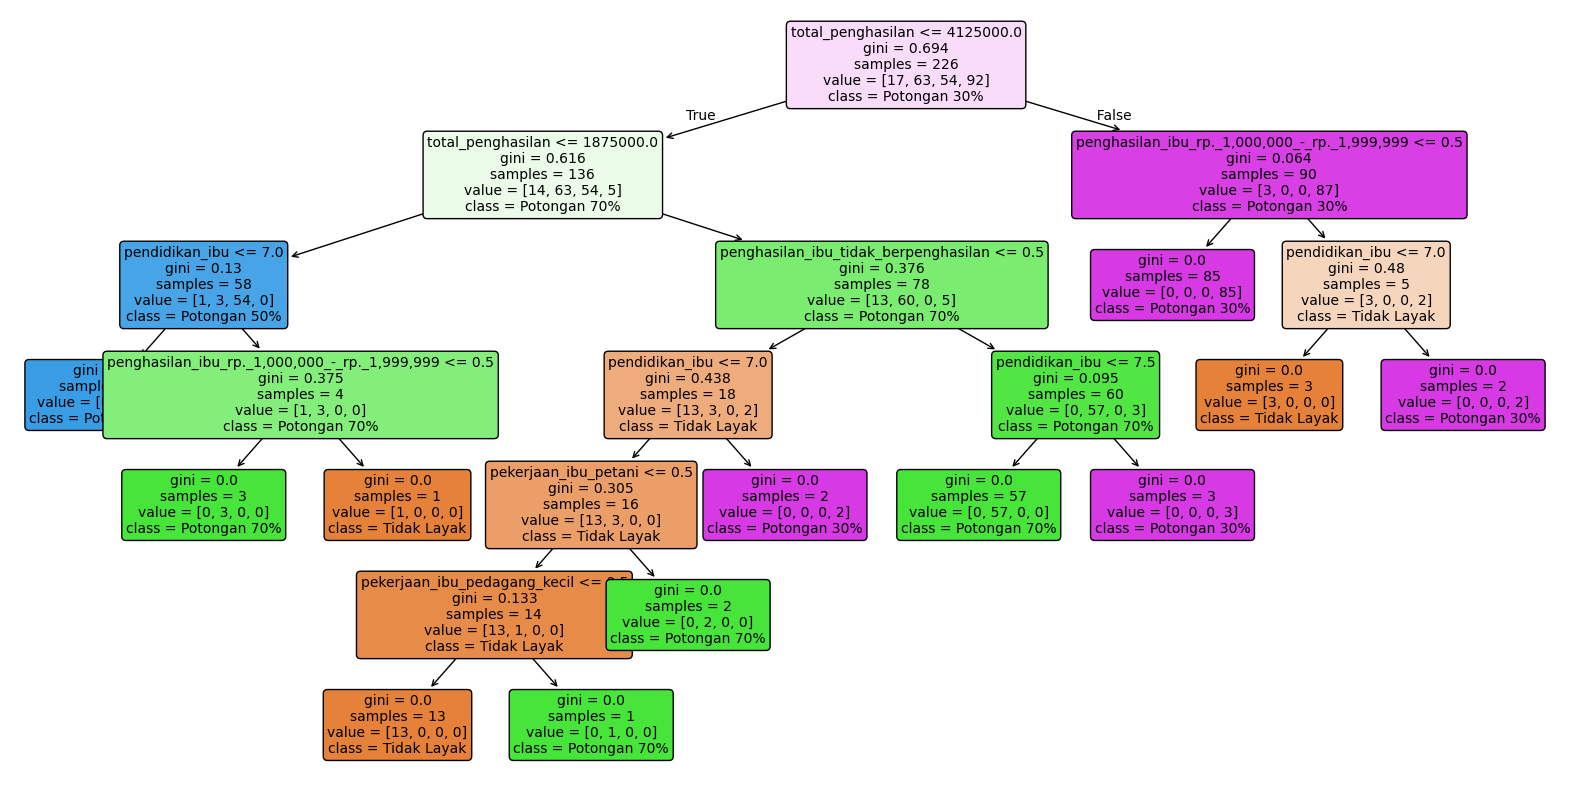

In [108]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Menampilkan pohon keputusan
plt.figure(figsize=(20, 10))  # Menyesuaikan ukuran gambar
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)

# Menampilkan plot pohon keputusan
plt.show()

In [97]:
# Menyimpan model ke file
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")

Model saved successfully!
